In [2]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import os
import math
from tqdm import tqdm_notebook as tqdm
import warnings
warnings.filterwarnings('ignore')
from shapely.geometry import *
from shapely.ops import *

In [3]:
path=('./done_oct/')

# 1. На вход подаются данные по валидациям, привязанным к остановкам за 3 дня

In [9]:
DATA=pd.read_csv(path+'For_matrix_2019_10_16.csv', sep = ',', encoding='utf-8')
DATA2=pd.read_csv(path+'For_matrix_2019_10_17.csv', sep = ',', encoding='utf-8')
DATA2['time']=DATA2['time']+24*3600 #прибалвяем 24 часа в секундах
DATA3=pd.read_csv(path+'For_matrix_2019_10_18.csv', sep = ',', encoding='utf-8')
DATA3['time']=DATA3['time']+24*3600+24*3600 #прибалвяем 24*2  часа (2 дня) в секундах
DATA=DATA.append(DATA2).append(DATA3)

In [10]:
DATA=DATA[['Дата и время поездки','Номер кристалла','TCAT','Код Маршрута','Код предприятия','mr_id','time','ssId','rl_id','rc_orderby']]

In [11]:
len(DATA)

1248518

In [12]:
DATA['mr_id'].unique()

array([  1,  10,  12,  14,  15,  17,  18,  20,  23,  24,  25,  26,  27,
        28,  30,  31,  32,  34,  35,  36,  37,  38,  39,  43,  44,  45,
        47,  48,  49,  59,  60,  61,  62,  64,  68,  70,  71,  73,  81,
        97,  98,  99, 100, 103, 111, 112, 113, 114, 115, 116, 117, 118,
       119, 120, 121, 122, 126, 127, 129, 130, 132, 133, 134, 135, 136,
       137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 151, 152, 176,
       187, 199,  19, 102], dtype=int64)

In [13]:
subway=pd.read_csv(path+'stops_subway.csv', sep = ';', encoding='utf-8')

In [14]:
subway.head()

,ssId,Станция,ss_lat,ss_long
0,2081,Алабинская,53.209188,50.133092
1,2082,Российская,53.211449,50.149668
2,2083,Московская,53.203067,50.160567
3,2084,Гагаринская,53.200304,50.176584
4,2085,Спортивная,53.200954,50.199017


# 2. Загружаем данные метрополитена (при наличии)

In [15]:
METRO=pd.read_csv(path+'./metro/2019.10.16.csv', sep=',', encoding='windows-1251')
METRO=METRO.merge(subway,on='Станция', how ='left')
METRO['Код Маршрута']='subway'
METRO['mr_id']=0
METRO['rl_id']=0
METRO['rc_orderby']=0
METRO['time']=pd.to_datetime(METRO['Дата и время поездки'])
METRO['hour']=METRO['time'].dt.hour
METRO['min']=METRO['time'].dt.minute
METRO['sec']=METRO['time'].dt.second
METRO['time']=(METRO['hour'].astype(int))*3600+(METRO['min'].astype(int))*60+(METRO['sec'].astype(int))
METRO=METRO.drop('hour',axis=1).drop('sec',axis=1).drop('min',axis=1).drop('Терминал',axis=1).drop('NUM_TRIP',axis=1)
METRO=METRO[['Дата и время поездки','Номер кристалла','TCAT','Код Маршрута','Код предприятия','mr_id','time','ssId','rl_id','rc_orderby']]

РАЗМАЗЫВАЕМ 43684 в течение дня

In [16]:
METRO['c']=1+(43684/len(METRO))

In [17]:
METRO2=pd.read_csv(path+'./metro/2019.10.17.csv', sep=',', encoding='windows-1251')
METRO2=METRO2.merge(subway,on='Станция', how ='left')
METRO2['Код Маршрута']='subway'
METRO2['mr_id']=0
METRO2['rl_id']=0
METRO2['rc_orderby']=0
METRO2['time']=pd.to_datetime(METRO2['Дата и время поездки'])
METRO2['hour']=METRO2['time'].dt.hour
METRO2['min']=METRO2['time'].dt.minute
METRO2['sec']=METRO2['time'].dt.second
METRO2['time']=(METRO2['hour'].astype(int))*3600+(METRO2['min'].astype(int))*60+(METRO2['sec'].astype(int))+24*3600
METRO2=METRO2.drop('hour',axis=1).drop('sec',axis=1).drop('min',axis=1).drop('Терминал',axis=1).drop('NUM_TRIP',axis=1)
METRO2=METRO2[['Дата и время поездки','Номер кристалла','TCAT','Код Маршрута','Код предприятия','mr_id','time','ssId','rl_id','rc_orderby']]
METRO2['c']=1+(43684/len(METRO2))

In [18]:
len(METRO2)

33682

In [19]:
METRO3=pd.read_csv(path+'./metro/2019.10.18.csv', sep=',', encoding='windows-1251')
METRO3=METRO3.merge(subway,on='Станция', how ='left')
METRO3['Код Маршрута']='subway'
METRO3['mr_id']=0
METRO3['rl_id']=0
METRO3['rc_orderby']=0
METRO3['time']=pd.to_datetime(METRO3['Дата и время поездки'])
METRO3['hour']=METRO3['time'].dt.hour
METRO3['min']=METRO3['time'].dt.minute
METRO3['sec']=METRO3['time'].dt.second
METRO3['time']=(METRO3['hour'].astype(int))*3600+(METRO3['min'].astype(int))*60+(METRO3['sec'].astype(int))+24*3600+24*3600
METRO3=METRO3.drop('hour',axis=1).drop('sec',axis=1).drop('min',axis=1).drop('Терминал',axis=1).drop('NUM_TRIP',axis=1)
METRO3=METRO3[['Дата и время поездки','Номер кристалла','TCAT','Код Маршрута','Код предприятия','mr_id','time','ssId','rl_id','rc_orderby']]
METRO3['c']=1+(43684/len(METRO3))

In [20]:
DATA['c']=1

In [21]:
DATA=DATA.append(METRO).append(METRO2).append(METRO3)

In [22]:
del METRO
del METRO2
del METRO3
del DATA2
del DATA3

In [23]:
len(DATA)

1349420

# 3. Привязываем все валидации к сайтам

In [24]:
sites=pd.read_csv(path+'stop_seq.csv', sep = ';', encoding='utf-8')
sites=sites[['ssId','site_id']].drop_duplicates()
DATA=DATA.merge(sites,on='ssId', how='left')
len(DATA[DATA['ssId']==0])

141064

In [25]:
len(DATA)

1349420

In [26]:
DATA.head()

,Дата и время поездки,Номер кристалла,TCAT,Код Маршрута,Код предприятия,mr_id,time,ssId,rl_id,rc_orderby,c,site_id
0,2019-10-16 10:35:51,C502D58F,СОЦ,10003456789,5,1,38151,0,0,NaN,1.0,NaN
1,2019-10-16 10:36:23,NaN,БАНК,10003456789,5,1,38183,0,0,NaN,1.0,NaN
2,2019-10-16 10:36:57,118F850F,КШ,10003456789,5,1,38217,0,0,NaN,1.0,NaN
3,2019-10-16 10:37:07,5D09C9AE,СОЦ,10003456789,5,1,38227,0,0,NaN,1.0,NaN
4,2019-10-16 10:37:12,551B6DF9,СОЦ,10003456789,5,1,38232,0,0,NaN,1.0,NaN


In [27]:
DATA[DATA['Дата и время поездки'].str.contains( '2019-10-16')] 

,Дата и время поездки,Номер кристалла,TCAT,Код Маршрута,Код предприятия,mr_id,time,ssId,rl_id,rc_orderby,c,site_id
0,2019-10-16 10:35:51,C502D58F,СОЦ,10003456789,5,1,38151,0,0,NaN,1.000000,NaN
1,2019-10-16 10:36:23,NaN,БАНК,10003456789,5,1,38183,0,0,NaN,1.000000,NaN
2,2019-10-16 10:36:57,118F850F,КШ,10003456789,5,1,38217,0,0,NaN,1.000000,NaN
3,2019-10-16 10:37:07,5D09C9AE,СОЦ,10003456789,5,1,38227,0,0,NaN,1.000000,NaN
4,2019-10-16 10:37:12,551B6DF9,СОЦ,10003456789,5,1,38232,0,0,NaN,1.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1282653,2019-10-16 06:13:48,3788C309,ЕТК,subway,2,0,22428,2082,0,0.0,2.279555,995.0
1282654,2019-10-16 06:12:19,7E81903E,ЕТК,subway,2,0,22339,2082,0,0.0,2.279555,995.0
1282655,2019-10-16 06:08:05,C17C0124,ЕТК,subway,2,0,22085,2082,0,0.0,2.279555,995.0
1282656,2019-10-16 06:04:06,2E944A11,ЕТК,subway,2,0,21846,2082,0,0.0,2.279555,995.0


# 4. ВЫБРАЛИ ДАННЫЕ ЗА ЧАС ПИК

In [ ]:
#выбрала час пик только из перовго дня
DATA_pick=DATA[DATA['Дата и время поездки'].str.contains( '2019-10-16')] 
DATA_pick=DATA_pick[DATA_pick['Дата и время поездки'].str.contains( ' 07:')]\
    .append(DATA_pick[DATA_pick['Дата и время поездки'].str.contains( ' 08:')])\
    .append(DATA_pick[DATA_pick['Дата и время поездки'].str.contains( ' 09:')])

In [ ]:
#выбрала дневной промежуток только из перовго дня
#DATA_pick=DATA[DATA['Дата и время поездки'].str.contains( '2019-10-16')] 
#DATA_pick=DATA_pick[DATA_pick['Дата и время поездки'].str.contains( '2019-10-16 10:')]\
#    .append(DATA_pick[DATA_pick['Дата и время поездки'].str.contains( '2019-10-16 11:')])\
#    .append(DATA_pick[DATA_pick['Дата и время поездки'].str.contains( '2019-10-16 12:')])\
#    .append(DATA_pick[DATA_pick['Дата и время поездки'].str.contains( '2019-10-16 13:')])\
#        .append(DATA_pick[DATA_pick['Дата и время поездки'].str.contains( '2019-10-16 14:')])

In [28]:
#выбрала вечерний промежуток только из перовго дня
DATA_pick=DATA[DATA['Дата и время поездки'].str.contains( '2019-10-16')] 
DATA_pick=DATA_pick[DATA_pick['Дата и время поездки'].str.contains( '2019-10-16 15:')]\
    .append(DATA_pick[DATA_pick['Дата и время поездки'].str.contains( '2019-10-16 16:')])\
    .append(DATA_pick[DATA_pick['Дата и время поездки'].str.contains( '2019-10-16 17:')])

In [29]:
len(DATA_pick)

113378

# 5. Убираем и запоминаем из выборки тех, у кого нет номера кристалла (невозможно точно привязать точку выхода)

In [30]:
DATA_bank_pick=DATA_pick[DATA_pick['Номер кристалла'].isna()]

ОСТАВЛЯЕМ В ЧАСЕ ПИК ТОЛЬКО ТЕХ, у кого есть номер кристалла:

In [ ]:
DATA_pick=DATA_pick[~DATA_pick.index.isin(DATA_bank_pick.index)]

In [ ]:
DATA_pick['time'].min()

In [ ]:
DATA_pick['time'].max()

Выбрала из общего массива только те данные, где встречаются валидации из пикового промежутка:

In [ ]:
DATA=DATA[DATA['Номер кристалла'].isin(DATA_pick['Номер кристалла'].unique())]

In [ ]:
len(DATA)

Выбрала только те значения, которые встречаются спустя 3 часа после начала часа пик

In [ ]:
DATA=DATA[DATA['time']>DATA_pick['time'].min()+3*3600]

In [ ]:
DATA=DATA.sort_values(['Номер кристалла','time','site_id'])

In [ ]:
DATA_pick=DATA_pick.sort_values(['Номер кристалла','time','site_id'])

In [ ]:
len(DATA_pick)

In [ ]:
len(DATA)

In [ ]:
from tqdm import tqdm
k=0
res=DATA_pick
result = []
result2 = []
result3 = []
result4 = []
stops=pd.DataFrame()
with tqdm(total=DATA_pick.shape[0]) as pbar: 
    for index, row in DATA_pick.iterrows():
        pbar.update(1)
        stops=DATA[(DATA['Номер кристалла']==row['Номер кристалла'])
                    &(DATA['time']>(row['time']+3600*3))
                    &(DATA['site_id']!=row['site_id'])]
        if stops.empty:
            result.append(0)
            result2.append(0)
            result3.append(0)
            result4.append(0)
        else:
            stop_unic=stops['site_id'].values
            result.append(stop_unic[0])
            time_2=stops['time'].values
            result2.append(time_2[0])
            rl_id=stops['rl_id'].values
            result3.append(rl_id[0])
            rc_orderby=stops['rc_orderby'].values
            result4.append(rc_orderby[0])
res['site_id_2']=result
res['time_2']=result2
res['rl_id_2']=result3
res['rc_orderby_2']=result4

In [ ]:
res.to_csv(path+'res_matrix_PICK_2019_10_16.csv')

In [4]:
res2=pd.read_csv(path+'res_matrix_all_day_2019_10_16.csv')

In [6]:
res=res2[res2['Дата и время поездки'].str.contains('2019-10-16 15:')]\
    .append(res2[res2['Дата и время поездки'].str.contains('2019-10-16 16:')])\
    .append(res2[res2['Дата и время поездки'].str.contains('2019-10-16 17:')])

In [7]:
len(res)

99673

In [31]:
len(res[(res['site_id_2']>0)&(res['site_id']>0)&(res['site_id_2']!=res['site_id'])])

76687

In [32]:
len(res[(res['site_id_2']>0)&(res['site_id']>0)&(res['site_id_2']!=res['site_id'])])/len(res)

0.7693858918664032

In [33]:
res=res.fillna(0)

In [34]:
res['c'].sum()

110417.42144112478

In [35]:
res=res.groupby(['site_id','site_id_2','mr_id']).agg({'c':np.nansum}).reset_index() 

In [36]:
res['c'].sum()

110417.42144112481

Заполняем неприязавшиеся Site_ID наиболее подходящими ID сайтов на маршруте

In [37]:
res_not_null=res[(res['site_id_2']>0)&(res['site_id']>0)] #выбрали из матрицы те строки, где все значения есть
res_null_last_stops=res[((res['site_id_2']==0)|(res['site_id_2'].isna()))
                        &(res['site_id']>0)].drop(['site_id_2'], axis=1) #выбрали только те строки, где есть остановка входа, но нет остановки выхода
res_null_first_stops=res[((res['site_id']==0)|(res['site_id'].isna()))
                        &(res['site_id_2']>0)].drop(['site_id'], axis=1) #выбрали только те строки, где есть остановка вЫхода, но нет остановки входа

Записываем всё, что не записалось и не определилось в массив res_null_null

In [38]:
res_null_null=res[~res.index.isin(res_not_null.index)]
res_null_null2=res_null_null[~res_null_null.index.isin(res_null_last_stops.index)]
del res_null_null
res_null_null=res_null_null2[~res_null_null2.index.isin(res_null_first_stops.index)].drop(['site_id'], axis=1).drop(['site_id_2'], axis=1)
del res_null_null2


In [39]:
res_null_null=res_null_null.reset_index()
res_null_last_stops=res_null_last_stops.reset_index()
res_null_first_stops=res_null_first_stops.reset_index()

Проверили, что все, что разделили между массивами входило в изначальный

In [40]:
len(res)-(len(res_not_null)+len(res_null_null)+len(res_null_last_stops)+len(res_null_first_stops))

0

In [41]:
res['c'].dropna().sum()

110417.42144112481

In [42]:
res_null_null['c'].unique()

array([ 2., 18.,  9., 17., 20., 11.,  3., 58.,  5., 24.])

Добавляем банк

In [43]:
#добавили в выборку, где не привязались посл.остановки баноквские карты, где есть валидация начала
DATA_bank_ssid=DATA_bank_pick[DATA_bank_pick['site_id']>0]
DATA_bank_ssid['c']=1
DATA_bank_ssid=DATA_bank_ssid.fillna(0)
DATA_bank_ssid=DATA_bank_ssid[['mr_id','site_id','c']]
res_null_last_stops=res_null_last_stops.append(DATA_bank_ssid).reset_index()

In [44]:
#добавили в выборку, где ничего не привязалось баноквские карты, где нет валидаций начала
DATA_bank_null=DATA_bank_pick[~DATA_bank_pick.index.isin(DATA_bank_ssid.index)]
DATA_bank_null['c']=1
DATA_bank_null=DATA_bank_null[['mr_id','site_id','c']]
DATA_bank_null=DATA_bank_null.fillna(0)
res_null_null=res_null_null.append(DATA_bank_null).reset_index()

In [45]:
len(res)+len(DATA_bank_pick)-(len(res_not_null)+len(res_null_null)+len(res_null_last_stops)+len(res_null_first_stops))

0

Сгруппировали все выгрузки, чтобы меньше хранить в оперативной памяти:

In [46]:
res_null_null=res_null_null.fillna(0)

In [47]:
res_null_null=res_null_null.groupby(['mr_id']).agg({'c':np.sum}).reset_index() 

In [48]:
res_null_last_stops=res_null_last_stops.groupby(['mr_id','site_id']).agg({'c':np.sum}).reset_index() 

In [49]:
res_null_first_stops=res_null_first_stops.groupby(['mr_id','site_id_2']).agg({'c':np.sum}).reset_index() 

In [50]:
res_not_null=res_not_null.groupby(['mr_id','site_id','site_id_2']).agg({'c':np.sum}).reset_index() 

In [51]:
res_not_null=res_not_null.sort_values(by=['c'],ascending=False)

In [52]:
res_null_null['c'].sum()+res_null_last_stops['c'].sum()+res_null_first_stops['c'].sum()+res_not_null['c'].sum()

124122.42144112481

Определяем наиболее подходящие остановки для высадки на маршруте:

In [53]:
#Размазываем вход-выход для случая, когда мы знаем ВХОД
def input_func(res_not_null):
    input_=res_not_null.groupby(['site_id','site_id_2']).agg({'c':np.sum}).reset_index() 
    sum_mr_id=input_.groupby(['site_id']).agg({'c':np.sum}).reset_index() 
    input_=input_.merge(sum_mr_id, on =['site_id'])
    input_['c_x']=input_['c_x']/input_['c_y']
    input_=input_.drop(['c_y'], axis=1).rename(columns={'c_x':'c'})
    return input_

In [54]:
#Размазываем вход-выход для случая, когда мы знаем ВЫХОД
def exit_func(res_not_null):
    exit=res_not_null.groupby(['site_id','site_id_2']).agg({'c':np.sum}).reset_index() 
    sum_mr_id=exit.groupby(['site_id_2']).agg({'c':np.sum}).reset_index() 
    exit=exit.merge(sum_mr_id, on =['site_id_2'])
    exit['c_x']=exit['c_x']/exit['c_y']
    exit=exit.drop(['c_y'], axis=1).rename(columns={'c_x':'c'})
    return exit

In [55]:
#Там где не определился конец поездки, выбираем наиболее подходящую site для выхода (пропорционально выходу)
input_=input_func(res_not_null)
res_null_last_stops2=res_null_last_stops.merge(input_,on=['site_id'],how='left')
res_null_last_stops2['c']=res_null_last_stops2['c_x']*res_null_last_stops2['c_y']
res_null_last_stops2=res_null_last_stops2.groupby(['mr_id','site_id','site_id_2']).agg({'c':np.sum}).reset_index()

In [56]:
#записываем результат
res_null_last_stops2=res_null_last_stops2.fillna(0)
res_not_null=res_not_null.append(res_null_last_stops2[res_null_last_stops2['site_id_2']>0])

In [57]:
#записываем оставшиеся непривязавшиеся остановки
res_null_last_stops3=res_null_last_stops2[res_null_last_stops2['site_id_2']==0]
res_null_null=res_null_null.append(res_null_last_stops3.drop(['site_id_2'], axis=1).drop(['site_id'], axis=1))
del res_null_last_stops2
del res_null_last_stops

In [58]:
#Там где не определился конец поездки, выбираем наиболее подходящую SsID для выхода (пропорционально входу)
exit=exit_func(res_not_null)
res_null_first_stops2=res_null_first_stops.merge(exit,on=['site_id_2'],how='left')
res_null_first_stops2['c']=res_null_first_stops2['c_x']*res_null_first_stops2['c_y']
res_null_first_stops2=res_null_first_stops2.groupby(['mr_id','site_id','site_id_2']).agg({'c':np.sum}).reset_index()
res_null_first_stops2=res_null_first_stops2.fillna(0)
#записываем результат
res_not_null=res_not_null.append(res_null_first_stops2[res_null_first_stops2['site_id_2']>0])

In [59]:
#записываем оставшиеся непривязавшиеся остановки
res_null_first_stops3=res_null_first_stops2[res_null_first_stops2['site_id_2']==0]
res_null_null=res_null_null.append(res_null_first_stops3.drop(['site_id_2'], axis=1).drop(['site_id'], axis=1))
del res_null_first_stops2
del res_null_first_stops
del res_null_first_stops3

Снова группируем

In [60]:
res_not_null=res_not_null.groupby(['mr_id','site_id','site_id_2']).agg({'c':np.sum}).reset_index() 

In [61]:
res_not_null['c'].sum()

123879.42144112478

In [62]:
#Размазываем вход-выход для случая, когда мы НИЧЕГО НЕ ЗНАЕМ
exit_input=res_not_null.groupby(['mr_id','site_id','site_id_2']).agg({'c':np.sum}).reset_index() 
sum_mr_id=exit_input.groupby(['mr_id']).agg({'c':np.sum}).reset_index() 
exit_input=exit_input.merge(sum_mr_id, on ='mr_id')
exit_input['c_x']=exit_input['c_x']/exit_input['c_y']
exit_input=exit_input.drop(['c_y'], axis=1).rename(columns={'c_x':'c'})

In [63]:
exit_input

,mr_id,site_id,site_id_2,c
0,0,31.0,1.0,0.000007
1,0,31.0,4.0,0.000007
2,0,31.0,6.0,0.000007
3,0,31.0,7.0,0.000007
4,0,31.0,10.0,0.000022
...,...,...,...,...
233779,199,800.0,796.0,0.000065
233780,199,800.0,829.0,0.000033
233781,199,800.0,872.0,0.000033
233782,199,829.0,477.0,0.001757


In [64]:
#Там где ничего не определилось, размазываем валидацию по всем парам вероятным :
res_null_null2=res_null_null.merge(exit_input,on=['mr_id'],how='left')
res_null_null2['c']=res_null_null2['c_x']*res_null_null2['c_y']
res_null_null2=res_null_null2.drop('c_x',axis=1).drop('c_y',axis=1)

In [65]:
#добавляем размазанные данные в то, где известно, что это за остановка
res_not_null2=res_not_null.append(res_null_null2)

In [66]:
res_null_null2=res_null_null2.fillna(0)

In [67]:
res_not_null2=res_not_null2.groupby(['site_id','site_id_2']).agg({'c':np.sum}).reset_index()

In [68]:
itog=res_not_null2['c'].sum()

In [69]:
itog

124119.42144112478

In [70]:
DAY=pd.read_csv(path+'2019.10.16.csv', sep = ',', encoding='windows-1251')

In [71]:
DAY=DAY[DAY['Код предприятия'].isin([1,4,5])]

In [72]:
len(DAY)

419751

Кол-во валидаций на НГПТ за день составило:

In [73]:
day=len(DAY)

In [74]:
METRO=pd.read_csv(path+'./metro/2019.10.16.csv', sep=',', encoding='windows-1251')

Кол-во валидаций на НГПТ за час пик день составило:

In [75]:
#DAY_pick=DAY[DAY['Дата и время поездки'].str.contains( ' 07:')]\
#    .append(DAY[DAY['Дата и время поездки'].str.contains( ' 08:')])\
#    .append(DAY[DAY['Дата и время поездки'].str.contains( ' 09:')])
pick=len(DATA_pick)

In [76]:
10852053/pick

95.71568558274092

In [77]:
pick

113378

Годовой поток по пригородным маршрутам составил 15369619

Переход к месяцу Октябрь от года - 10,73 (делим)

Переход к одному дню октября = 396 889 (средний будний день в октябре 2019 года)/10 852 053 (суммарный месячный поток в октябре 2019 за год)

Переход к часу - пик - делим кол-во валидаций за день к количеству валидаций за час пик 


В рабочий день в МЕТРО перемещается 43 684

In [78]:
15369619-2230

15367389

In [79]:
(15369619/10.73)*(396889/10852053)*(pick/day)/itog

0.11400341103527808

In [80]:
res_not_null2['c']=res_not_null2['c']+((15369619-2230)/10.73)*(396889/10852053)*(pick/day)/itog

In [81]:
res_not_null2['c'].sum()

128017.65841226772

In [82]:
matrix=res_not_null2.groupby(['site_id','site_id_2']).agg({'c':np.sum}).reset_index()

In [83]:
matrix=matrix.sort_values(by='c',ascending=False)

In [84]:
matrix['site_id']=matrix['site_id'].astype('int64')

In [85]:
matrix['c']=round(matrix['c'])

In [86]:
matrix['c']=matrix['c'].astype(int)

In [87]:
matrix['site_id_2']=matrix['site_id_2'].astype('int64')

In [88]:
matrix['c'].sum()

130780

In [ ]:
#вспомогательный блок для переименования сайтов (когда нашла ошибку, что не объединила часть сайтов)
#sites_unic=pd.read_csv(path+'site_ID_NEW.csv', sep = ';', encoding='utf-8')
#matrix2=matrix.merge(sites_unic, on ='site_id', how='left')
#matrix2.loc[matrix2['site_id_new'].isna(),'site_id_new']=matrix2.loc[matrix2['site_id_new'].isna(),'site_id']
#matrix2=matrix2.merge(sites_unic, left_on ='site_id_2', right_on ='site_id', how='left')
#matrix2.loc[matrix2['site_id_new_y'].isna(),'site_id_new_y']=matrix2.loc[matrix2['site_id_new_y'].isna(),'site_id_2']
#matrix=matrix2[['site_id_new_x','site_id_new_y','c']]
#matrix=matrix.rename(columns={'site_id_new_x':'site_id','site_id_new_y':'site_id_2'})

In [89]:
matrix.to_csv(path+'matrix_oct_EVN_PICK.csv')

## Анализируем сайты, которые не вошли в матрицу, смотрим, не вошли ли они в видеоаналитику

In [90]:
sites_unic=pd.read_csv(path+'sites_coordinate.csv', sep = ';', encoding='utf-8')

In [91]:
#считали связь сайтов с остановками из Яндекса
Yandex_stop=pd.read_csv(path+'videoanal/Yandex_stop_with_site.csv',sep=';')

In [92]:
#считали данные видеоаналитики
video_data=pd.read_csv(path+'videoanal/videoanal_by_stops.csv',encoding='utf-8', sep=";")
video_data=video_data[video_data['Широта'].notna()]
video_data=video_data[video_data['Перевозчик']=='Рейс'] #выбрали только частника
video_data=video_data.fillna(0)
video_data['Открытие двери']=video_data['Открытие двери'].astype(str)

In [93]:
video_data['Открытие двери'].unique()

array(['05:11:13', '0', '05:13:46', ..., '09:29:52', '09:36:22',
       '09:37:03'], dtype=object)

In [ ]:
#video_data2=video_data[video_data['Открытие двери'].str.startswith('07:')]\
#    .append(video_data[video_data['Открытие двери'].str.startswith('08:')])\
#    .append(video_data[video_data['Открытие двери'].str.startswith('09:')])

In [94]:
video_data2=video_data[video_data['Открытие двери'].str.startswith('15:')]\
    .append(video_data[video_data['Открытие двери'].str.startswith('16:')])\
    .append(video_data[video_data['Открытие двери'].str.startswith('17:')])

In [95]:
Yandex_stop=Yandex_stop[['stop_id','site_id']]

In [96]:
#привзяали остановки к сайтам

video_data2=video_data2.merge(Yandex_stop, left_on='ID остановки (Яндекс)', right_on='stop_id')

In [97]:
#cчитали частоту хождения по маршрутам
freq=pd.read_csv(path+'videoanal/freq2.csv',encoding='utf-8',sep=';')

In [98]:
freq=freq.fillna(0)

In [99]:
video_data2[0:1]

,Дата,ТС,Модель ТС,Площадь по полу,Количество сидячих мест,Регистратор,Тип,Город,Перевозчик,Маршрут,...,ID сегмента открытых дверей,Открытие двери,Закрытие двери,Номер двери,Вошло,Вышло,В салоне,Видео,stop_id,site_id
0,2020-09-11,АмкСам126(Р585),Hyundai County (LWB),"1,2",18,130084.0,АМК,Самара,Рейс,126ю,...,973799.0,15:02:28,15:02:34,1.0,1.0,0.0,2,http://transport-video.infraforecast.info/vide...,stop__10001520,100


In [100]:
len(video_data2)

20405

In [101]:
#перешли к входу среднему на одном рейсе
video_data2=pd.DataFrame(video_data2.groupby(['route_id','trip_id','site_id']).agg({'Вошло':np.mean}).reset_index())

In [102]:
#перешли к среднему выходу на одном рейсе автобусов перевозчика 'Рейс'
vyxod_reis=pd.DataFrame(video_data.groupby(['route_id','trip_id','ID остановки (Яндекс)']).agg({'Вышло':np.mean}).reset_index())

In [103]:
vyxod_reis=vyxod_reis.merge(Yandex_stop, left_on='ID остановки (Яндекс)', right_on='stop_id', how='left')

In [104]:
#выбрали только те остановки,по которым будем размазывать выход (убрали те остановки, на которых у нас вход и там, где выход = 0)
#vyxod_reis=vyxod_reis[~vyxod_reis['site'].isin(video_data2['site'].unique())]
vyxod_reis=vyxod_reis[vyxod_reis['Вышло']>0]

In [105]:
vyxod_reis=pd.DataFrame(vyxod_reis.groupby(['trip_id','site_id']).agg({'Вышло':np.mean}).reset_index())

In [106]:
#считаем суммарный выход на одном направлении на одном маршруте:
vyxod_reis_group_trip_id=pd.DataFrame(vyxod_reis.groupby(['trip_id']).agg({'Вышло':np.sum}).reset_index())

In [107]:
#размазываем 
vyxod_reis=vyxod_reis.merge(vyxod_reis_group_trip_id, on ='trip_id',how='outer')
vyxod_reis['part']=vyxod_reis['Вышло_x']/vyxod_reis['Вышло_y']
vyxod_reis=vyxod_reis[['trip_id','site_id','part']]

In [108]:
video_data2=video_data2[['trip_id','site_id','Вошло']]

In [109]:
matrix_video=video_data2.merge(vyxod_reis, on ='trip_id', how='outer')

In [110]:
matrix_video['c']=matrix_video['Вошло']*matrix_video['part']

In [111]:
matrix_video=matrix_video[matrix_video['site_id_x'].notna()]

In [112]:
matrix_video[0:1]

,trip_id,site_id_x,Вошло,site_id_y,part,c
0,2193179196,20.0,1.285714,20.0,0.012263,0.015767


In [113]:
matrix_video=matrix_video.merge(freq,left_on ='site_id_x',right_on ='site_id', how='left')

In [114]:
matrix_video['freq']=matrix_video['freq'].fillna(1)

In [115]:
matrix_video['c']=matrix_video['c']*matrix_video['freq']

In [116]:
matrix_video['c'].sum()

1097.5039870303672

In [117]:
matrix_video

,trip_id,site_id_x,Вошло,site_id_y,part,c,site_id,freq
0,2193179196,20.0,1.285714,20.0,0.012263,0.157672,20.0,10.0
1,2193179196,20.0,1.285714,61.0,0.017847,0.229460,20.0,10.0
2,2193179196,20.0,1.285714,62.0,0.022286,0.286539,20.0,10.0
3,2193179196,20.0,1.285714,64.0,0.020318,0.261232,20.0,10.0
4,2193179196,20.0,1.285714,66.0,0.013385,0.172095,20.0,10.0
...,...,...,...,...,...,...,...,...
18338,2193179862,1331.0,0.000000,1327.0,0.041574,0.000000,NaN,1.0
18339,2193179862,1331.0,0.000000,1328.0,0.008627,0.000000,NaN,1.0
18340,2193179862,1331.0,0.000000,1329.0,0.014828,0.000000,NaN,1.0
18341,2193179862,1331.0,0.000000,1330.0,0.014687,0.000000,NaN,1.0


In [118]:
matrix_video=pd.DataFrame(matrix_video.groupby(['site_id_x','site_id_y']).agg({'c':np.sum}).reset_index())

In [119]:
matrix_video=matrix_video.rename(columns={'site_id_x':'site_id','site_id_y':'site_id_2'})

# Ура, дозаписываем данные видеоаналитики в данные по валидациям

In [120]:
#matrix=pd.read_csv(path+'matrix_oct_new_sites.csv')
matrix['c'].sum()

130780

In [121]:

matrix=matrix[matrix['c']>0]
matrix=matrix[['site_id','site_id_2','c']]

In [122]:
matrix_video['c']=matrix_video['c'].astype('int64')
matrix_video['site_id']=matrix_video['site_id'].astype('int64')
matrix_video['site_id_2']=matrix_video['site_id_2'].astype('int64')

In [123]:
matrix=matrix.append(matrix_video)

In [124]:
matrix=pd.DataFrame(matrix.groupby(['site_id','site_id_2']).agg({'c':np.sum}).reset_index())

In [125]:
matrix['site_id_2']=matrix['site_id_2'].astype('int64')

In [126]:
matrix['c'].sum()

131093

In [127]:
matrix.to_csv(path+'RES_NEW/matrix_oct_EVN_PICK_15_17_59.csv', index=False)

## Рассчитываем принадлежность сайта тому или иному транспортному району

In [128]:
sites_unic=pd.read_csv(path+'sites_coordinate.csv', sep = ';', encoding='utf-8')

In [129]:
len(sites_unic)

736

In [130]:
sites_gpd = gpd.GeoDataFrame(sites_unic, \
                              geometry = [Point(xy) for xy in zip(sites_unic['ss_long'], sites_unic['ss_lat'])])
sites_gpd.crs='epsg:4326'

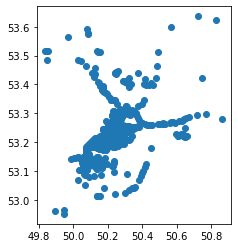

In [131]:
sites_gpd.plot()

In [132]:
transport_zone=gpd.read_file('557_zone.shp', encoding='utf-8')

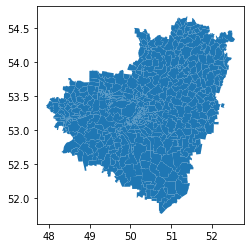

In [133]:
transport_zone.plot()

In [134]:
transport_zone.head()

,NO,geometry
0,1,"POLYGON ((49.74624 53.47745, 49.74695 53.48435..."
1,2,"POLYGON ((50.26787 53.17875, 50.24173 53.20126..."
2,3,"POLYGON ((50.34918 53.23681, 50.35777 53.22709..."
3,4,"POLYGON ((50.34862 53.32653, 50.33540 53.32700..."
4,5,"POLYGON ((49.22210 53.59736, 49.21382 53.55950..."


In [135]:
site_taz=gpd.sjoin(sites_gpd, transport_zone, how='left', op='within', lsuffix='left', rsuffix='right')

In [136]:
site_taz=site_taz.rename(columns={'NO':'Транспортные районы'})

In [137]:
site_taz['Транспортные районы'].unique()

array([302., 300., 303., 539., 299., 537., 542., 166., 165., 162., 161.,
       156., 553., 554., 555., 147., 155., 544., 154.,   2.,   3., 146.,
       550., 547., 145., 546., 153., 517., 522., 513., 151., 515., 159.,
       149., 516., 514., 511., 509., 158., 551., 552., 157., 548., 549.,
       163., 541., 543., 150., 160.,  nan, 229., 510., 512., 143., 545.,
       538., 144., 301., 164., 540., 309., 310.,   1., 148., 305., 518.,
       519., 523., 225., 222., 526., 227., 274., 276., 479., 520., 275.,
       223., 226., 119., 277., 336., 343., 351., 296., 535., 334., 482.,
       141., 337., 335., 333., 331., 341., 304., 484., 332., 142., 297.,
       279., 298., 308., 278., 340., 556., 339.])

In [138]:
Pop=pd.read_csv(path+'Pop2025.csv', encoding='windows-1251', sep=";")

In [139]:
Pop[0:1]

,Транспортные районы,Муниципалитет (нижний уровень),Город/ Муниципалитет,Факт_20_нас,Факт_20_раб,Инерция_25,Базовый_25,Б+_25,Ц+_25,Инерция_35,...,Б+_35,Ц+_35,Инерция_раб_25,Базовый_раб_25,Б+_раб_25,Ц+_раб_25,Инерция_раб_35,Базовый_раб_35,Б+_раб_35,Ц+_раб_35
0,1,Красноглинский район,городской округ Самара,8512,2888.555939,8615,8617,8329,8479,8235,...,6080,6584,2863.556561,2976.612721,2976.612721,3066.718597,2731.662723,3083.388383,3083.388383,3354.098505


## РАСЧЧИТЫВАЕМ ПРОНОЗНУЮ МАТРИЦУ

In [140]:
from math import sqrt

In [141]:
Pop['koeff_pop_24']=Pop['Базовый_25']/Pop['Факт_20_нас']
Pop['koeff_work_24']=(Pop['Базовый_раб_25']/Pop['Факт_20_раб']).apply(np.sqrt)
Pop['koeff_pop_35']=Pop['Базовый_35']/Pop['Факт_20_нас']         
Pop['koeff_work_35']=(Pop['Базовый_раб_35']/Pop['Факт_20_раб']).apply(np.sqrt)
Pop['koeff_pop_30']=(Pop['Базовый_35']+Pop['Базовый_25'])/(2*Pop['Факт_20_нас'])     
Pop['koeff_work_30']=((Pop['Базовый_раб_35']+Pop['Базовый_раб_25'])/2/Pop['Факт_20_раб']).apply(np.sqrt)

In [142]:
Pop=Pop[['Транспортные районы','koeff_pop_24','koeff_pop_30','koeff_pop_35','koeff_work_24','koeff_work_30','koeff_work_35']]

In [143]:
site_taz=site_taz.merge(Pop,on='Транспортные районы')

In [144]:
site_koeff=site_taz[['site_id','Транспортные районы','koeff_pop_24','koeff_pop_30','koeff_pop_35','koeff_work_24','koeff_work_30','koeff_work_35']].drop_duplicates()

In [145]:
site_koeff_from=site_koeff.add_suffix('_from').rename(columns={'site_id_from':'site_id'})
site_koeff_to=site_koeff.add_suffix('_to').rename(columns={'site_id_to':'site_id_2'})
site_koeff_from=site_koeff_from[['site_id','Транспортные районы_from','koeff_pop_24_from','koeff_pop_30_from','koeff_pop_35_from']]
site_koeff_to=site_koeff_to[['site_id_2','Транспортные районы_to','koeff_work_24_to','koeff_work_30_to','koeff_work_35_to']]

In [146]:
matrix_taz=matrix.merge(site_koeff_from,on ='site_id', how='left')
matrix_taz=matrix_taz.merge(site_koeff_to,on ='site_id_2',how='left')

In [147]:
matrix_taz=pd.DataFrame(matrix_taz.groupby(['Транспортные районы_from','Транспортные районы_to']).agg({'c':np.sum}).reset_index())

In [148]:
matrix_taz=matrix_taz[matrix_taz['c']>0]

In [149]:
matrix_taz.to_csv(path+'matrix_taz.csv')

In [150]:
matrix['c']=matrix['c'].astype('float')

In [151]:
matrix_taz=matrix_taz.sort_values(by='c', ascending=False)

In [152]:
matrix_taz=matrix_taz.merge(transport_zone,left_on='Транспортные районы_from',right_on='NO')

In [153]:
matrix_taz=matrix_taz.merge(transport_zone,left_on='Транспортные районы_to',right_on='NO')

In [168]:
matrix_forecast=matrix.merge(site_koeff_from,on ='site_id', how='left')
matrix_forecast=matrix_forecast.merge(site_koeff_to,on ='site_id_2',how='left')

In [169]:
matrix_forecast[0:10]

,site_id,site_id_2,c,Транспортные районы_from,koeff_pop_24_from,koeff_pop_30_from,koeff_pop_35_from,Транспортные районы_to,koeff_work_24_to,koeff_work_30_to,koeff_work_35_to
0,1,2,4.0,302.0,0.987121,0.968831,0.95054,302.0,1.015128,1.024191,1.033175
1,1,3,2.0,302.0,0.987121,0.968831,0.95054,302.0,1.015128,1.024191,1.033175
2,1,4,4.0,302.0,0.987121,0.968831,0.95054,302.0,1.015128,1.024191,1.033175
3,1,5,4.0,302.0,0.987121,0.968831,0.95054,302.0,1.015128,1.024191,1.033175
4,1,6,4.0,302.0,0.987121,0.968831,0.95054,302.0,1.015128,1.024191,1.033175
5,1,7,4.0,302.0,0.987121,0.968831,0.95054,302.0,1.015128,1.024191,1.033175
6,1,8,4.0,302.0,0.987121,0.968831,0.95054,300.0,1.015128,1.024191,1.033175
7,1,8,4.0,302.0,0.987121,0.968831,0.95054,303.0,1.015128,1.024191,1.033175
8,1,12,4.0,302.0,0.987121,0.968831,0.95054,539.0,1.015128,1.024191,1.033175
9,1,13,2.0,302.0,0.987121,0.968831,0.95054,537.0,1.015128,1.024191,1.033175


In [170]:
matrix_forecast['2025']=matrix_forecast['c']*matrix_forecast['koeff_pop_24_from']*matrix_forecast['koeff_work_24_to']

In [171]:
matrix_forecast['2030']=matrix_forecast['c']*matrix_forecast['koeff_pop_30_from']*matrix_forecast['koeff_work_30_to']

In [172]:
matrix_forecast['2035']=matrix_forecast['c']*matrix_forecast['koeff_pop_35_from']*matrix_forecast['koeff_work_35_to']

In [173]:
matrix_forecast=matrix_forecast[['site_id','site_id_2','c','2025','2030','2035']]

In [174]:
#выделили общественно деловые районы:
raby=['2','3','4','13','23','143','157','160','510','516','543','551','552','553','555']

In [175]:
matrix_forecast['udal']=1.0

In [176]:
matrix_forecast.loc[matrix_forecast['site_id_2'].isin(raby),'udal']=0.9

In [177]:
matrix_forecast['2025']=matrix_forecast['2025']*matrix_forecast['udal']
matrix_forecast['2030']=matrix_forecast['2030']*matrix_forecast['udal']
matrix_forecast['2035']=matrix_forecast['2035']*matrix_forecast['udal']

In [178]:
matrix_forecast=matrix_forecast[['site_id','site_id_2','c','2025','2030','2035']]

In [179]:
matrix_forecast=matrix_forecast[matrix_forecast['c']>0]

In [180]:
matrix_forecast=matrix_forecast.rename(columns={'c':'2020'})

In [181]:
matrix_forecast.to_csv(path+'RES_NEW/matrix_forecast_EVN_PICK_15_00_17_59.csv',index=False)

In [ ]:
matrix_forecast['2035'].sum()

In [ ]:
matrix_forecast['2030'].sum()

In [ ]:
matrix_forecast['2025'].sum()

In [ ]:
site_taz[0:1]

In [ ]:
site_taz=site_taz[['site_id','Транспортные районы','geometry']]

In [ ]:
matrix_forecast=pd.read_csv(path+'res/matrix_forecast.csv')

In [ ]:
matrix_forecast=matrix_forecast[matrix_forecast['c']>0].reset_index()

In [ ]:
matrix_forecast=matrix_forecast.merge(site_taz, on='site_id',how='left')

In [ ]:
matrix_forecast=matrix_forecast.merge(site_taz, left_on='site_id_2',right_on='site_id',how='left')

In [ ]:
matrix_forecast

In [ ]:
matrix_forecast=pd.DataFrame(matrix_forecast.groupby(['Транспортные районы_x','Транспортные районы_y']).agg({'c':np.sum,'2025':np.sum,'2030':np.sum,'2035':np.sum}).reset_index())

In [ ]:
matrix_forecast['delta']=matrix_forecast['2035']-matrix_forecast['c']

In [ ]:
matrix_forecast=matrix_forecast.sort_values(by='delta', ascending=False)

In [ ]:
matrix_forecast[matrix_forecast['Транспортные районы_x']==150]

In [ ]:
transport_zone_from=transport_zone.rename(columns={'NO':'Транспортные районы_x'})
transport_zone_to=transport_zone.rename(columns={'NO':'Транспортные районы_y'})

In [ ]:
matrix_forecast_from=matrix_forecast[matrix_forecast['Транспортные районы_y']==517]

In [ ]:
matrix_forecast_from=matrix_forecast_from.merge(transport_zone_from, on='Транспортные районы_x', how='left')

In [ ]:
matrix_forecast_from[0:2]

In [ ]:
matrix_forecast_from= gpd.GeoDataFrame(matrix_forecast_from)
matrix_forecast_from.crs='epsg:4326'

In [ ]:
matrix_forecast_from.to_file(fr"C:\Users\user\Documents\GIT\city\user_scripts\masha_k\Transnavigation\for_presentaion\to517.json", index=False, driver="GeoJSON", encoding='utf-8')

# ПРИВЯЗЫВАЕМ остановки яндекса к сайтам

In [ ]:
sites_unic=pd.read_csv(path+'sites_coordinate.csv', sep = ';', encoding='utf-8')

In [ ]:
stops_Yandex=pd.read_csv(path+'videoanal/stop_seq_from_Ya.csv',sep=',')

In [ ]:
#сформировали геослой из остановок
stops_Yandex=gpd.GeoDataFrame(stops_Yandex, \
                              geometry = [Point(xy) for xy in zip(stops_Yandex['longitude'], stops_Yandex['latitude'])])
stops_Yandex.crs='epsg:4326'

In [ ]:
sites_with_buff[0:2]

In [ ]:
stops_Yandex[0:2]

In [ ]:
#привязали остановки к сайтам с буфером 200 метров
sites_with_buff = sites_gpd.to_crs('epsg:32640')
sites_with_buff.geometry = sites_with_buff.geometry.buffer(200)
sites_with_buff = sites_with_buff.to_crs('epsg:4326')

In [ ]:
stops_Yandex2=gpd.sjoin(stops_Yandex, sites_with_buff, how='left', op='within', lsuffix='left', rsuffix='right')

In [ ]:
stops_Yandex2=stops_Yandex2[['route_id','trip_id','stop_id','stop_sequence','latitude','longitude','site_id','geometry']]

In [ ]:
stops_Yandex2=stops_Yandex2.drop_duplicates(subset=['stop_id','route_id','trip_id'])

In [ ]:
#привязали остановки к сайтам с буфером 500 метров
sites_with_buff = sites_gpd.to_crs('epsg:32640')
sites_with_buff.geometry = sites_with_buff.geometry.buffer(500)
sites_with_buff = sites_with_buff.to_crs('epsg:4326')
stops_Yandex=gpd.sjoin(stops_Yandex2, sites_with_buff, how='left', op='within', lsuffix='left', rsuffix='right')

In [ ]:
stops_Yandex=stops_Yandex[['route_id','trip_id','stop_id','stop_sequence','latitude','longitude','site_id_left','site_id_right','geometry']]

In [ ]:
stops_Yandex=stops_Yandex.drop_duplicates(subset=['stop_id','route_id','trip_id'])

In [ ]:
stops_Yandex.loc[stops_Yandex['site_id_left'].isna(),'site_id_left']=stops_Yandex.loc[stops_Yandex['site_id_left'].isna(),'site_id_right']

In [ ]:
stops_Yandex[['route_id','trip_id','stop_id','stop_sequence','latitude','longitude','site_id_left']].to_csv(path+'videoanal/Yandex_stop_with_site.csv')

In [ ]:
# Расчёт растояния между координатами
from math import radians, cos, sin, asin, sqrt
def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    
    # haversine formula 
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a))
    r = 6371 * 1000 # Radius of earth in kilometers. Use 3956 for miles
    return c * r

In [ ]:
stops_seq=pd.read_csv(path+'stop_seq_v3.csv',sep=';',encoding='windows-1251')

In [ ]:
stops_seq['ss_lat_1']=stops_seq.groupby(['mr_id','rl_id'])['ss_lat'].shift(-1)

In [ ]:
stops_seq['ss_long_1']=stops_seq.groupby(['mr_id','rl_id'])['ss_long'].shift(-1)

In [ ]:
stops_seq['len'] = stops_seq.apply(lambda row: haversine(row.ss_long, row.ss_lat, row.ss_long_1, row.ss_lat_1), axis = 1)

In [ ]:
stops_seq.to_csv(path+'stop_seq_v4.csv')

## Визаулизация матрицы

In [ ]:
matrix[0:1]

In [ ]:
site=pd.read_csv('./done_oct/res/sites_coordinate.csv',sep=';')

In [ ]:
site[0:1]

In [ ]:
matrix_all_s=matrix.merge(site,on='site_id',how='left')
matrix_all_s=matrix_all_s.merge(site,left_on='site_id_2',right_on='site_id',how='left')
matrix_all_s=matrix_all_s[['site_id_x','site_id_2','c','ss_lat_x','ss_long_x','ss_lat_y','ss_long_y']]
matrix_all_s.groupby(['site_id_2']).agg({'c':np.sum}).sort_values(by='c', ascending=False)[0:10]

In [ ]:
matrix_all_s= gpd.GeoDataFrame(matrix_all_s,  geometry = [Point(xy) for xy in zip(matrix_all_s['ss_long_y'], matrix_all_s['ss_lat_y'])])
matrix_all_s.crs='epsg:4326'
matrix_all_s=matrix_all_s[matrix_all_s['site_id_x'].isin(['262','54','201','348'])]
matrix_all_s.groupby(['site_id_x']).apply(lambda x: x.to_file(fr"./done_oct/res/{x.name}_video.json", index=False, driver="GeoJSON", encoding='utf-8'))
matrix_all2=matrix_all_s[matrix_all_s['site_id_2'].isin(['262','54','201','348'])]
matrix_all2=matrix_all2[['site_id_2','geometry']].drop_duplicates()
matrix_all2.to_file(fr"./done_oct/res/sites.json", index=False, driver="GeoJSON", encoding='utf-8')

In [ ]:
matrix_video[matrix_video['site_id_2']==579]['c'].sum()